In [1]:
# filename: sigma_ss_pcc.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# If your CSV has headers like: R0,sigma,s1,s2,s3,...
df = pd.read_csv("./experimental_data/Dimmunity_ss_pcc.csv")

# Pull columns by name
R0   = df["R0"].to_numpy(dtype=float)
sigma = df["sigma"].to_numpy(dtype=float)


# Everything after Dimmunity & sigma is treated as summary columns
summary_cols = [c for c in df.columns if c not in ("R0", "sigma")]
summary = df[summary_cols].to_numpy(dtype=float)   # shape: (N, K)

print(R0.shape, sigma.shape, summary.shape)

(120,) (120,) (120, 12)


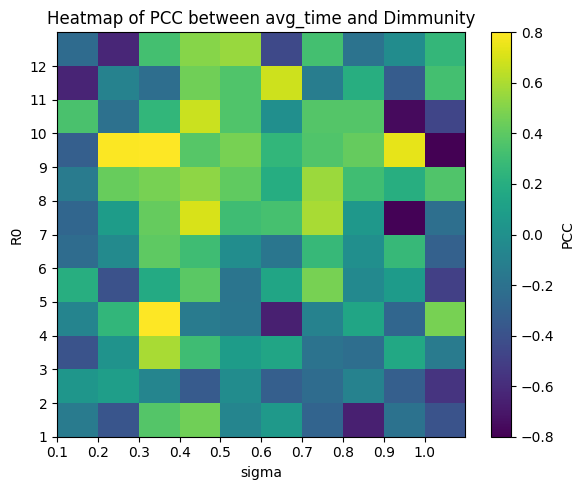

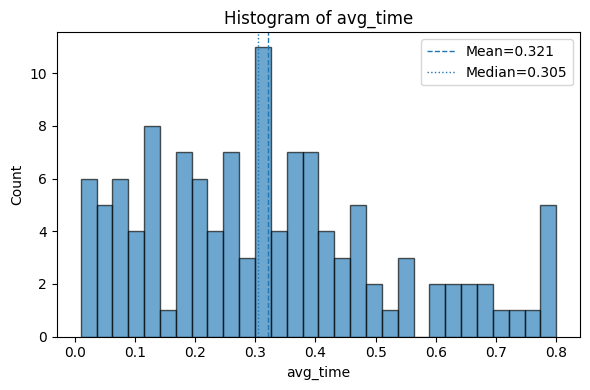

In [5]:
# Build matrix Z (sigma × Dimmunity) from your DataFrame
zcol = summary_cols[0]
Z_wide = (df.groupby(["R0", "sigma"], as_index=False)[zcol].mean()
            .pivot(index="R0", columns="sigma", values=zcol)
            .sort_index()              # sigma rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
SIGv  = Z_wide.columns.to_numpy(float)   # unique Dimmunity values (treated as LEFT edges)
R0v = Z_wide.index.to_numpy(float)     # unique sigma values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

sigmae,  dsigma  = left_edges_to_right_edges(SIGv)
R0e, dR0 = left_edges_to_right_edges(R0v)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(sigmae, R0e, Z, shading="flat")
plt.xlabel("sigma")
plt.ylabel("R0")
plt.title(f"Heatmap of PCC between {zcol} and Dimmunity")
plt.colorbar(pcm, label="PCC")

# Axes show exact edge ranges  [min, max+step]
plt.xlim(sigmae[0],  sigmae[-1])
plt.ylim(R0e[0], R0e[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(SIGv )
plt.yticks(R0v)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

# x = np.asarray(df)
x = df["avg_time"].to_numpy(dtype=float)   # 1D np.array
x = x[~np.isnan(x)]                        # drop NaNs
x = np.abs(x)
X = x.reshape(-1, 1)                       # 2D shape (n, 1)

plt.figure(figsize=(6,4))
counts, bins, patches = plt.hist(x, bins=30, edgecolor="black", alpha=0.65)  # counts on y-axis
# If you prefer a probability density instead of counts, use: density=True

# 3) (Optional) Add mean/median reference lines
plt.axvline(np.mean(x), linestyle="--", linewidth=1, label=f"Mean={np.mean(x):.3g}")
plt.axvline(np.median(x), linestyle=":",  linewidth=1, label=f"Median={np.median(x):.3g}")

plt.xlabel("avg_time")
plt.ylabel("Count")  # change to "Density" if using density=True
plt.title("Histogram of avg_time")
plt.legend()
plt.tight_layout()
plt.show()

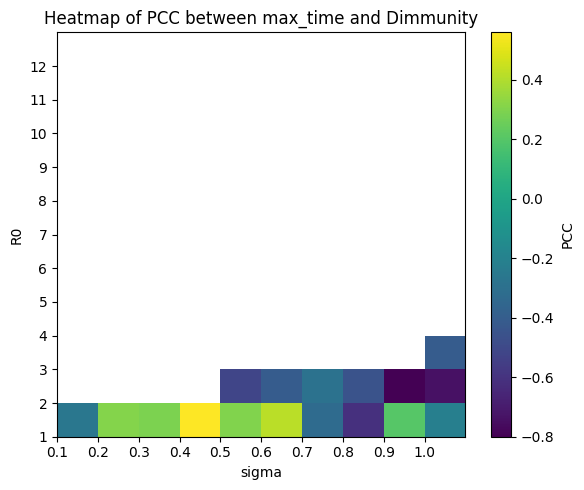

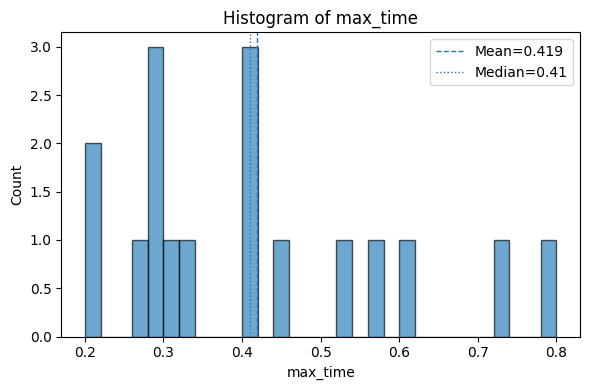

In [6]:
# Build matrix Z (sigma × Dimmunity) from your DataFrame
zcol = summary_cols[1]
Z_wide = (df.groupby(["R0", "sigma"], as_index=False)[zcol].mean()
            .pivot(index="R0", columns="sigma", values=zcol)
            .sort_index()              # sigma rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
SIGv  = Z_wide.columns.to_numpy(float)   # unique Dimmunity values (treated as LEFT edges)
R0v = Z_wide.index.to_numpy(float)     # unique sigma values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

sigmae,  dsigma  = left_edges_to_right_edges(SIGv)
R0e, dR0 = left_edges_to_right_edges(R0v)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(sigmae, R0e, Z, shading="flat")
plt.xlabel("sigma")
plt.ylabel("R0")
plt.title(f"Heatmap of PCC between {zcol} and Dimmunity")
plt.colorbar(pcm, label="PCC")

# Axes show exact edge ranges  [min, max+step]
plt.xlim(sigmae[0],  sigmae[-1])
plt.ylim(R0e[0], R0e[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(SIGv )
plt.yticks(R0v)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

# x = np.asarray(df)
x = df["max_time"].to_numpy(dtype=float)   # 1D np.array
x = x[~np.isnan(x)]                        # drop NaNs
x = np.abs(x)
X = x.reshape(-1, 1)                       # 2D shape (n, 1)

plt.figure(figsize=(6,4))
counts, bins, patches = plt.hist(x, bins=30, edgecolor="black", alpha=0.65)  # counts on y-axis
# If you prefer a probability density instead of counts, use: density=True

# 3) (Optional) Add mean/median reference lines
plt.axvline(np.mean(x), linestyle="--", linewidth=1, label=f"Mean={np.mean(x):.3g}")
plt.axvline(np.median(x), linestyle=":",  linewidth=1, label=f"Median={np.median(x):.3g}")

plt.xlabel("max_time")
plt.ylabel("Count")  # change to "Density" if using density=True
plt.title("Histogram of max_time")
plt.legend()
plt.tight_layout()
plt.show()

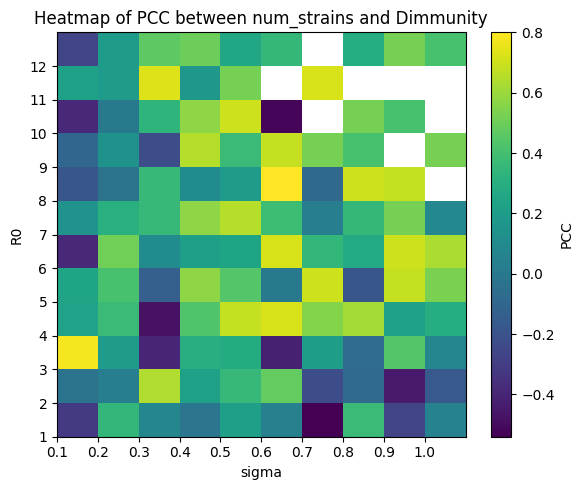

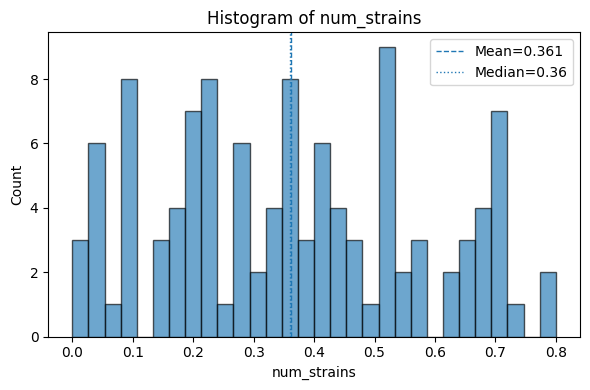

In [7]:
# Build matrix Z (sigma × Dimmunity) from your DataFrame
zcol = summary_cols[2]
Z_wide = (df.groupby(["R0", "sigma"], as_index=False)[zcol].mean()
            .pivot(index="R0", columns="sigma", values=zcol)
            .sort_index()              # sigma rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
SIGv  = Z_wide.columns.to_numpy(float)   # unique Dimmunity values (treated as LEFT edges)
R0v = Z_wide.index.to_numpy(float)     # unique sigma values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

sigmae,  dsigma  = left_edges_to_right_edges(SIGv)
R0e, dR0 = left_edges_to_right_edges(R0v)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(sigmae, R0e, Z, shading="flat")
plt.xlabel("sigma")
plt.ylabel("R0")
plt.title(f"Heatmap of PCC between {zcol} and Dimmunity")
plt.colorbar(pcm, label="PCC")

# Axes show exact edge ranges  [min, max+step]
plt.xlim(sigmae[0],  sigmae[-1])
plt.ylim(R0e[0], R0e[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(SIGv )
plt.yticks(R0v)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

# x = np.asarray(df)
x = df["num_strains"].to_numpy(dtype=float)   # 1D np.array
x = x[~np.isnan(x)]                        # drop NaNs
x = np.abs(x)
X = x.reshape(-1, 1)                       # 2D shape (n, 1)

plt.figure(figsize=(6,4))
counts, bins, patches = plt.hist(x, bins=30, edgecolor="black", alpha=0.65)  # counts on y-axis
# If you prefer a probability density instead of counts, use: density=True

# 3) (Optional) Add mean/median reference lines
plt.axvline(np.mean(x), linestyle="--", linewidth=1, label=f"Mean={np.mean(x):.3g}")
plt.axvline(np.median(x), linestyle=":",  linewidth=1, label=f"Median={np.median(x):.3g}")

plt.xlabel("num_strains")
plt.ylabel("Count")  # change to "Density" if using density=True
plt.title("Histogram of num_strains")
plt.legend()
plt.tight_layout()
plt.show()

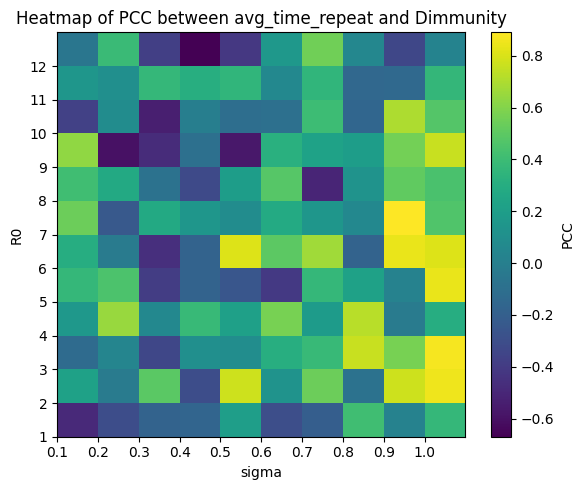

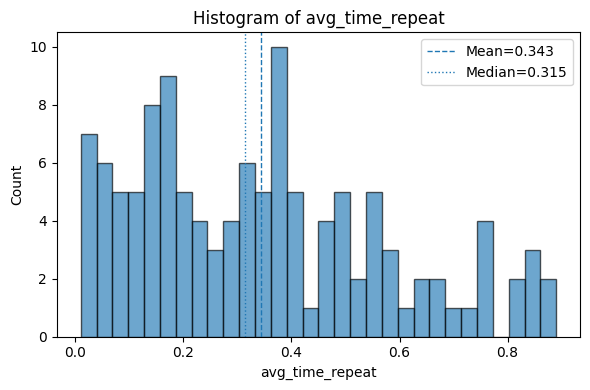

In [8]:
# Build matrix Z (sigma × Dimmunity) from your DataFrame
zcol = summary_cols[3]
Z_wide = (df.groupby(["R0", "sigma"], as_index=False)[zcol].mean()
            .pivot(index="R0", columns="sigma", values=zcol)
            .sort_index()              # sigma rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
SIGv  = Z_wide.columns.to_numpy(float)   # unique Dimmunity values (treated as LEFT edges)
R0v = Z_wide.index.to_numpy(float)     # unique sigma values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

sigmae,  dsigma  = left_edges_to_right_edges(SIGv)
R0e, dR0 = left_edges_to_right_edges(R0v)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(sigmae, R0e, Z, shading="flat")
plt.xlabel("sigma")
plt.ylabel("R0")
plt.title(f"Heatmap of PCC between {zcol} and Dimmunity")
plt.colorbar(pcm, label="PCC")

# Axes show exact edge ranges  [min, max+step]
plt.xlim(sigmae[0],  sigmae[-1])
plt.ylim(R0e[0], R0e[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(SIGv )
plt.yticks(R0v)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

# x = np.asarray(df)
x = df["avg_time_repeat"].to_numpy(dtype=float)   # 1D np.array
x = x[~np.isnan(x)]                        # drop NaNs
x = np.abs(x)
X = x.reshape(-1, 1)                       # 2D shape (n, 1)

plt.figure(figsize=(6,4))
counts, bins, patches = plt.hist(x, bins=30, edgecolor="black", alpha=0.65)  # counts on y-axis
# If you prefer a probability density instead of counts, use: density=True

# 3) (Optional) Add mean/median reference lines
plt.axvline(np.mean(x), linestyle="--", linewidth=1, label=f"Mean={np.mean(x):.3g}")
plt.axvline(np.median(x), linestyle=":",  linewidth=1, label=f"Median={np.median(x):.3g}")

plt.xlabel("avg_time_repeat")
plt.ylabel("Count")  # change to "Density" if using density=True
plt.title("Histogram of avg_time_repeat")
plt.legend()
plt.tight_layout()
plt.show()

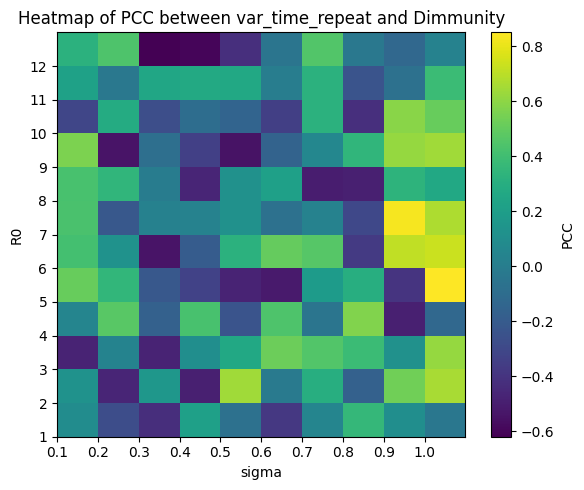

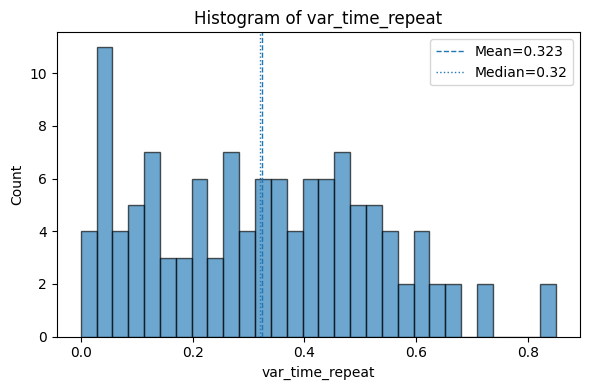

In [9]:
# Build matrix Z (sigma × Dimmunity) from your DataFrame
zcol = summary_cols[4]
Z_wide = (df.groupby(["R0", "sigma"], as_index=False)[zcol].mean()
            .pivot(index="R0", columns="sigma", values=zcol)
            .sort_index()              # sigma rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
SIGv  = Z_wide.columns.to_numpy(float)   # unique Dimmunity values (treated as LEFT edges)
R0v = Z_wide.index.to_numpy(float)     # unique sigma values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

sigmae,  dsigma  = left_edges_to_right_edges(SIGv)
R0e, dR0 = left_edges_to_right_edges(R0v)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(sigmae, R0e, Z, shading="flat")
plt.xlabel("sigma")
plt.ylabel("R0")
plt.title(f"Heatmap of PCC between {zcol} and Dimmunity")
plt.colorbar(pcm, label="PCC")

# Axes show exact edge ranges  [min, max+step]
plt.xlim(sigmae[0],  sigmae[-1])
plt.ylim(R0e[0], R0e[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(SIGv )
plt.yticks(R0v)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

# x = np.asarray(df)
x = df["var_time_repeat"].to_numpy(dtype=float)   # 1D np.array
x = x[~np.isnan(x)]                        # drop NaNs
x = np.abs(x)
X = x.reshape(-1, 1)                       # 2D shape (n, 1)

plt.figure(figsize=(6,4))
counts, bins, patches = plt.hist(x, bins=30, edgecolor="black", alpha=0.65)  # counts on y-axis
# If you prefer a probability density instead of counts, use: density=True

# 3) (Optional) Add mean/median reference lines
plt.axvline(np.mean(x), linestyle="--", linewidth=1, label=f"Mean={np.mean(x):.3g}")
plt.axvline(np.median(x), linestyle=":",  linewidth=1, label=f"Median={np.median(x):.3g}")

plt.xlabel("var_time_repeat")
plt.ylabel("Count")  # change to "Density" if using density=True
plt.title("Histogram of var_time_repeat")
plt.legend()
plt.tight_layout()
plt.show()

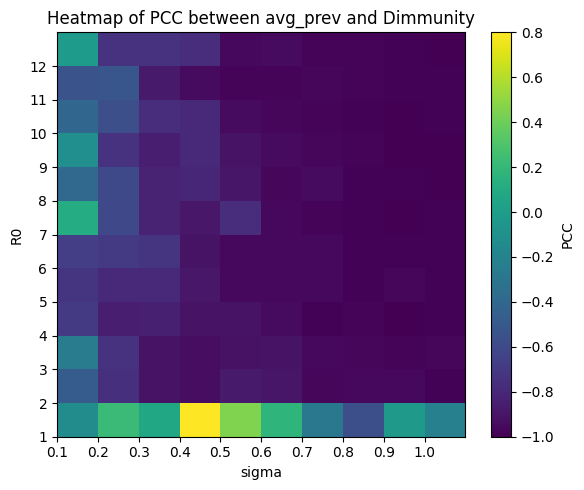

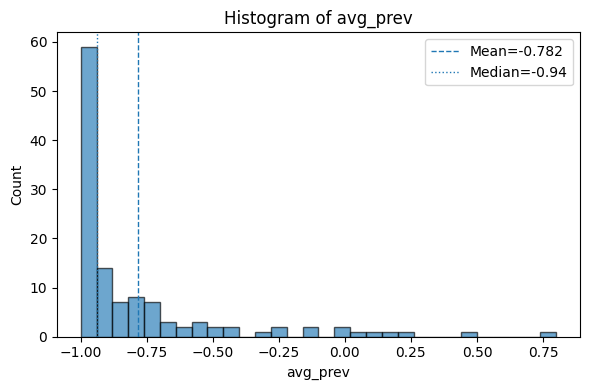

In [17]:
# Build matrix Z (sigma × Dimmunity) from your DataFrame
zcol = summary_cols[5]
Z_wide = (df.groupby(["R0", "sigma"], as_index=False)[zcol].mean()
            .pivot(index="R0", columns="sigma", values=zcol)
            .sort_index()              # sigma rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
SIGv  = Z_wide.columns.to_numpy(float)   # unique Dimmunity values (treated as LEFT edges)
R0v = Z_wide.index.to_numpy(float)     # unique sigma values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

sigmae,  dsigma  = left_edges_to_right_edges(SIGv)
R0e, dR0 = left_edges_to_right_edges(R0v)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(sigmae, R0e, Z, shading="flat")
plt.xlabel("sigma")
plt.ylabel("R0")
plt.title(f"Heatmap of PCC between {zcol} and Dimmunity")
plt.colorbar(pcm, label="PCC")

# Axes show exact edge ranges  [min, max+step]
plt.xlim(sigmae[0],  sigmae[-1])
plt.ylim(R0e[0], R0e[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(SIGv )
plt.yticks(R0v)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

# x = np.asarray(df)
x = df["avg_prev"].to_numpy(dtype=float)   # 1D np.array
x = x[~np.isnan(x)]                        # drop NaNs
# x = np.abs(x)
X = x.reshape(-1, 1)                       # 2D shape (n, 1)

plt.figure(figsize=(6,4))
counts, bins, patches = plt.hist(x, bins=30, edgecolor="black", alpha=0.65)  # counts on y-axis
# If you prefer a probability density instead of counts, use: density=True

# 3) (Optional) Add mean/median reference lines
plt.axvline(np.mean(x), linestyle="--", linewidth=1, label=f"Mean={np.mean(x):.3g}")
plt.axvline(np.median(x), linestyle=":",  linewidth=1, label=f"Median={np.median(x):.3g}")

plt.xlabel("avg_prev")
plt.ylabel("Count")  # change to "Density" if using density=True
plt.title("Histogram of avg_prev")
plt.legend()
plt.tight_layout()
plt.show()

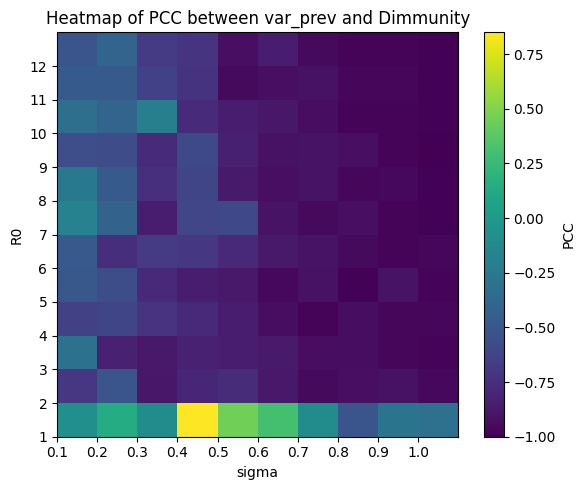

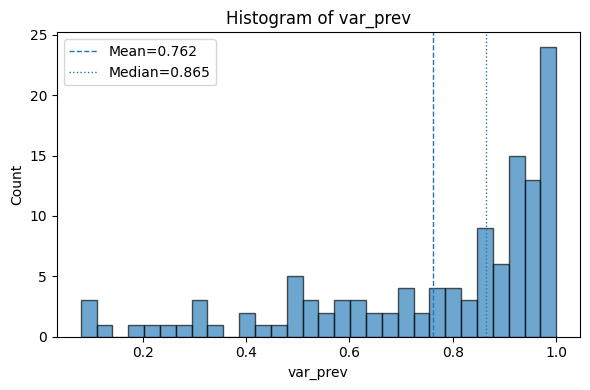

In [11]:
# Build matrix Z (sigma × Dimmunity) from your DataFrame
zcol = summary_cols[6]
Z_wide = (df.groupby(["R0", "sigma"], as_index=False)[zcol].mean()
            .pivot(index="R0", columns="sigma", values=zcol)
            .sort_index()              # sigma rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
SIGv  = Z_wide.columns.to_numpy(float)   # unique Dimmunity values (treated as LEFT edges)
R0v = Z_wide.index.to_numpy(float)     # unique sigma values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

sigmae,  dsigma  = left_edges_to_right_edges(SIGv)
R0e, dR0 = left_edges_to_right_edges(R0v)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(sigmae, R0e, Z, shading="flat")
plt.xlabel("sigma")
plt.ylabel("R0")
plt.title(f"Heatmap of PCC between {zcol} and Dimmunity")
plt.colorbar(pcm, label="PCC")

# Axes show exact edge ranges  [min, max+step]
plt.xlim(sigmae[0],  sigmae[-1])
plt.ylim(R0e[0], R0e[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(SIGv )
plt.yticks(R0v)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

# x = np.asarray(df)
x = df["var_prev"].to_numpy(dtype=float)   # 1D np.array
x = x[~np.isnan(x)]                        # drop NaNs
x = np.abs(x)
X = x.reshape(-1, 1)                       # 2D shape (n, 1)

plt.figure(figsize=(6,4))
counts, bins, patches = plt.hist(x, bins=30, edgecolor="black", alpha=0.65)  # counts on y-axis
# If you prefer a probability density instead of counts, use: density=True

# 3) (Optional) Add mean/median reference lines
plt.axvline(np.mean(x), linestyle="--", linewidth=1, label=f"Mean={np.mean(x):.3g}")
plt.axvline(np.median(x), linestyle=":",  linewidth=1, label=f"Median={np.median(x):.3g}")

plt.xlabel("var_prev")
plt.ylabel("Count")  # change to "Density" if using density=True
plt.title("Histogram of var_prev")
plt.legend()
plt.tight_layout()
plt.show()

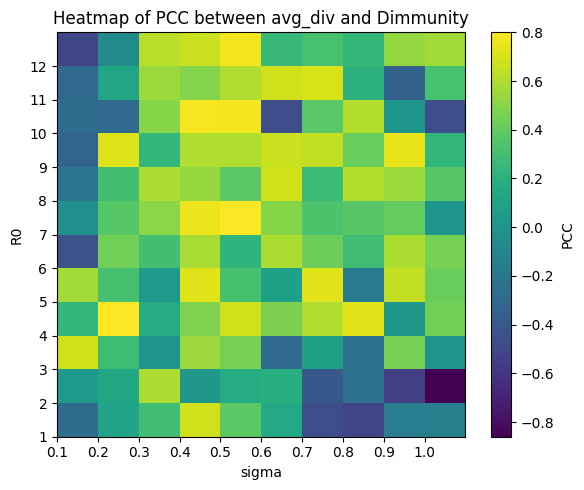

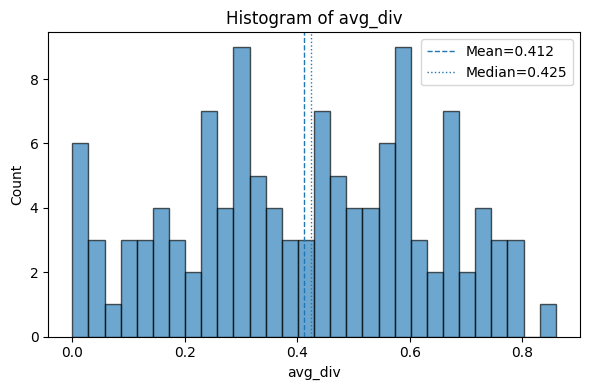

In [12]:
# Build matrix Z (sigma × Dimmunity) from your DataFrame
zcol = summary_cols[7]
Z_wide = (df.groupby(["R0", "sigma"], as_index=False)[zcol].mean()
            .pivot(index="R0", columns="sigma", values=zcol)
            .sort_index()              # sigma rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
SIGv  = Z_wide.columns.to_numpy(float)   # unique Dimmunity values (treated as LEFT edges)
R0v = Z_wide.index.to_numpy(float)     # unique sigma values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

sigmae,  dsigma  = left_edges_to_right_edges(SIGv)
R0e, dR0 = left_edges_to_right_edges(R0v)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(sigmae, R0e, Z, shading="flat")
plt.xlabel("sigma")
plt.ylabel("R0")
plt.title(f"Heatmap of PCC between {zcol} and Dimmunity")
plt.colorbar(pcm, label="PCC")

# Axes show exact edge ranges  [min, max+step]
plt.xlim(sigmae[0],  sigmae[-1])
plt.ylim(R0e[0], R0e[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(SIGv )
plt.yticks(R0v)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

# x = np.asarray(df)
x = df["avg_div"].to_numpy(dtype=float)   # 1D np.array
x = x[~np.isnan(x)]                        # drop NaNs
x = np.abs(x)
X = x.reshape(-1, 1)                       # 2D shape (n, 1)

plt.figure(figsize=(6,4))
counts, bins, patches = plt.hist(x, bins=30, edgecolor="black", alpha=0.65)  # counts on y-axis
# If you prefer a probability density instead of counts, use: density=True

# 3) (Optional) Add mean/median reference lines
plt.axvline(np.mean(x), linestyle="--", linewidth=1, label=f"Mean={np.mean(x):.3g}")
plt.axvline(np.median(x), linestyle=":",  linewidth=1, label=f"Median={np.median(x):.3g}")

plt.xlabel("avg_div")
plt.ylabel("Count")  # change to "Density" if using density=True
plt.title("Histogram of avg_div")
plt.legend()
plt.tight_layout()
plt.show()

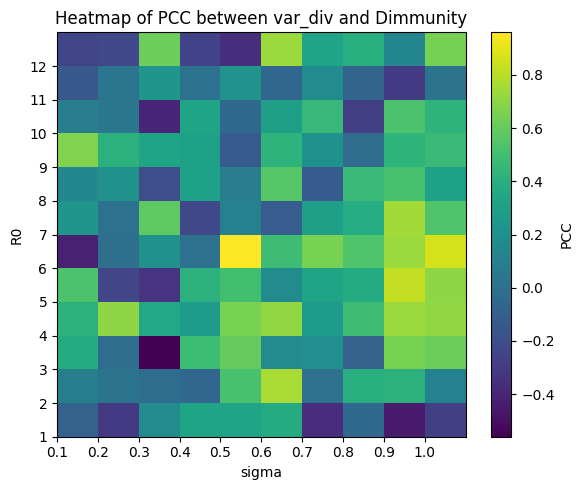

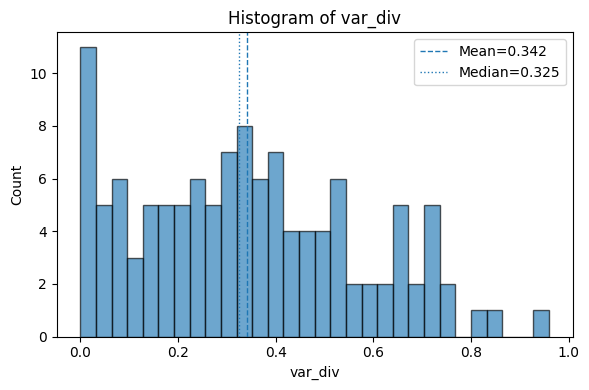

In [13]:
# Build matrix Z (sigma × Dimmunity) from your DataFrame
zcol = summary_cols[8]
Z_wide = (df.groupby(["R0", "sigma"], as_index=False)[zcol].mean()
            .pivot(index="R0", columns="sigma", values=zcol)
            .sort_index()              # sigma rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
SIGv  = Z_wide.columns.to_numpy(float)   # unique Dimmunity values (treated as LEFT edges)
R0v = Z_wide.index.to_numpy(float)     # unique sigma values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

sigmae,  dsigma  = left_edges_to_right_edges(SIGv)
R0e, dR0 = left_edges_to_right_edges(R0v)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(sigmae, R0e, Z, shading="flat")
plt.xlabel("sigma")
plt.ylabel("R0")
plt.title(f"Heatmap of PCC between {zcol} and Dimmunity")
plt.colorbar(pcm, label="PCC")

# Axes show exact edge ranges  [min, max+step]
plt.xlim(sigmae[0],  sigmae[-1])
plt.ylim(R0e[0], R0e[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(SIGv )
plt.yticks(R0v)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

# x = np.asarray(df)
x = df["var_div"].to_numpy(dtype=float)   # 1D np.array
x = x[~np.isnan(x)]                        # drop NaNs
x = np.abs(x)
X = x.reshape(-1, 1)                       # 2D shape (n, 1)

plt.figure(figsize=(6,4))
counts, bins, patches = plt.hist(x, bins=30, edgecolor="black", alpha=0.65)  # counts on y-axis
# If you prefer a probability density instead of counts, use: density=True

# 3) (Optional) Add mean/median reference lines
plt.axvline(np.mean(x), linestyle="--", linewidth=1, label=f"Mean={np.mean(x):.3g}")
plt.axvline(np.median(x), linestyle=":",  linewidth=1, label=f"Median={np.median(x):.3g}")

plt.xlabel("var_div")
plt.ylabel("Count")  # change to "Density" if using density=True
plt.title("Histogram of var_div")
plt.legend()
plt.tight_layout()
plt.show()

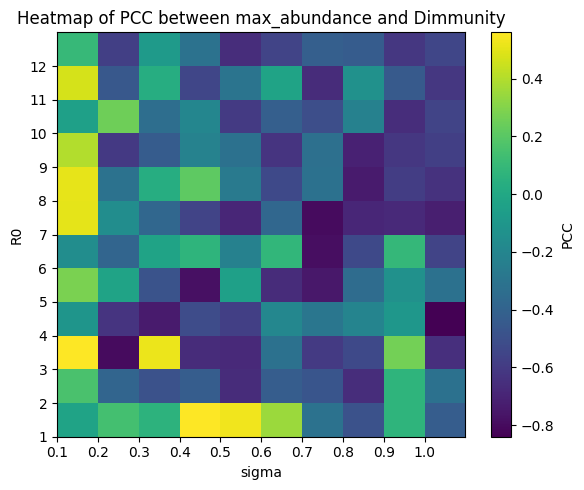

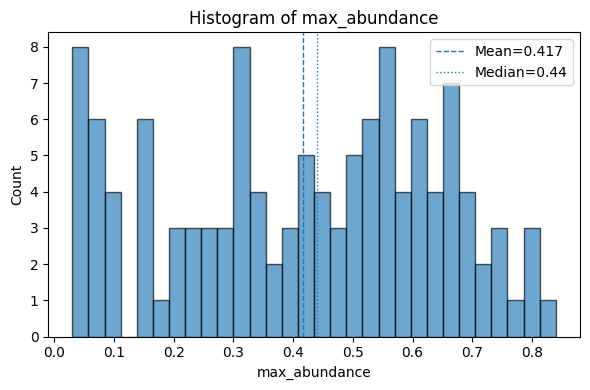

In [14]:
# Build matrix Z (sigma × Dimmunity) from your DataFrame
zcol = summary_cols[9]
Z_wide = (df.groupby(["R0", "sigma"], as_index=False)[zcol].mean()
            .pivot(index="R0", columns="sigma", values=zcol)
            .sort_index()              # sigma rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
SIGv  = Z_wide.columns.to_numpy(float)   # unique Dimmunity values (treated as LEFT edges)
R0v = Z_wide.index.to_numpy(float)     # unique sigma values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

sigmae,  dsigma  = left_edges_to_right_edges(SIGv)
R0e, dR0 = left_edges_to_right_edges(R0v)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(sigmae, R0e, Z, shading="flat")
plt.xlabel("sigma")
plt.ylabel("R0")
plt.title(f"Heatmap of PCC between {zcol} and Dimmunity")
plt.colorbar(pcm, label="PCC")

# Axes show exact edge ranges  [min, max+step]
plt.xlim(sigmae[0],  sigmae[-1])
plt.ylim(R0e[0], R0e[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(SIGv )
plt.yticks(R0v)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

# x = np.asarray(df)
x = df["max_abundance"].to_numpy(dtype=float)   # 1D np.array
x = x[~np.isnan(x)]                        # drop NaNs
x = np.abs(x)
X = x.reshape(-1, 1)                       # 2D shape (n, 1)

plt.figure(figsize=(6,4))
counts, bins, patches = plt.hist(x, bins=30, edgecolor="black", alpha=0.65)  # counts on y-axis
# If you prefer a probability density instead of counts, use: density=True

# 3) (Optional) Add mean/median reference lines
plt.axvline(np.mean(x), linestyle="--", linewidth=1, label=f"Mean={np.mean(x):.3g}")
plt.axvline(np.median(x), linestyle=":",  linewidth=1, label=f"Median={np.median(x):.3g}")

plt.xlabel("max_abundance")
plt.ylabel("Count")  # change to "Density" if using density=True
plt.title("Histogram of max_abundance")
plt.legend()
plt.tight_layout()
plt.show()

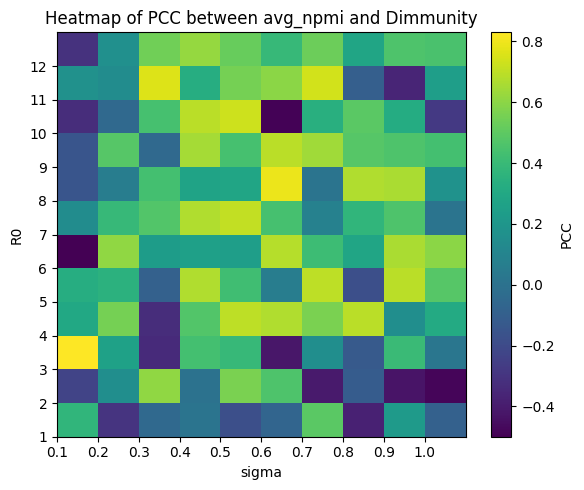

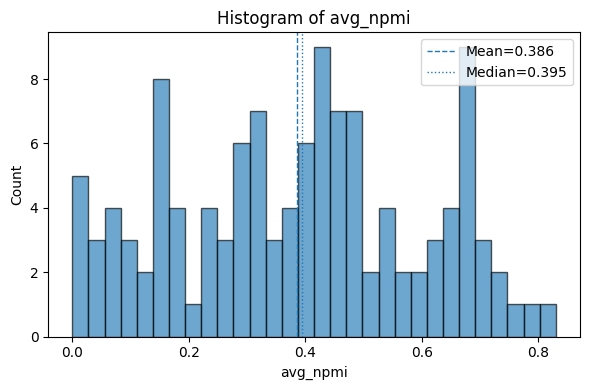

In [15]:
# Build matrix Z (sigma × Dimmunity) from your DataFrame
zcol = summary_cols[10]
Z_wide = (df.groupby(["R0", "sigma"], as_index=False)[zcol].mean()
            .pivot(index="R0", columns="sigma", values=zcol)
            .sort_index()              # sigma rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
SIGv  = Z_wide.columns.to_numpy(float)   # unique Dimmunity values (treated as LEFT edges)
R0v = Z_wide.index.to_numpy(float)     # unique sigma values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

sigmae,  dsigma  = left_edges_to_right_edges(SIGv)
R0e, dR0 = left_edges_to_right_edges(R0v)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(sigmae, R0e, Z, shading="flat")
plt.xlabel("sigma")
plt.ylabel("R0")
plt.title(f"Heatmap of PCC between {zcol} and Dimmunity")
plt.colorbar(pcm, label="PCC")

# Axes show exact edge ranges  [min, max+step]
plt.xlim(sigmae[0],  sigmae[-1])
plt.ylim(R0e[0], R0e[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(SIGv )
plt.yticks(R0v)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

# x = np.asarray(df)
x = df["avg_npmi"].to_numpy(dtype=float)   # 1D np.array
x = x[~np.isnan(x)]                        # drop NaNs
x = np.abs(x)
X = x.reshape(-1, 1)                       # 2D shape (n, 1)

plt.figure(figsize=(6,4))
counts, bins, patches = plt.hist(x, bins=30, edgecolor="black", alpha=0.65)  # counts on y-axis
# If you prefer a probability density instead of counts, use: density=True

# 3) (Optional) Add mean/median reference lines
plt.axvline(np.mean(x), linestyle="--", linewidth=1, label=f"Mean={np.mean(x):.3g}")
plt.axvline(np.median(x), linestyle=":",  linewidth=1, label=f"Median={np.median(x):.3g}")

plt.xlabel("avg_npmi")
plt.ylabel("Count")  # change to "Density" if using density=True
plt.title("Histogram of avg_npmi")
plt.legend()
plt.tight_layout()
plt.show()

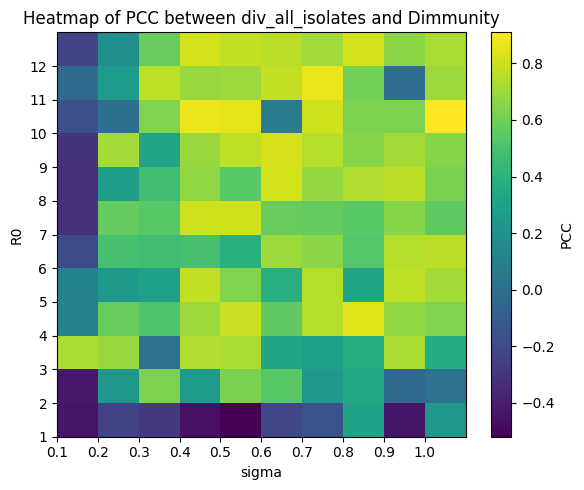

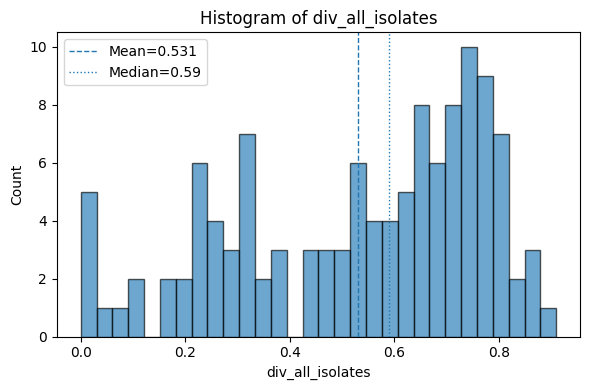

In [16]:
# Build matrix Z (sigma × Dimmunity) from your DataFrame
zcol = summary_cols[11]
Z_wide = (df.groupby(["R0", "sigma"], as_index=False)[zcol].mean()
            .pivot(index="R0", columns="sigma", values=zcol)
            .sort_index()              # sigma rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
SIGv  = Z_wide.columns.to_numpy(float)   # unique Dimmunity values (treated as LEFT edges)
R0v = Z_wide.index.to_numpy(float)     # unique sigma values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

sigmae,  dsigma  = left_edges_to_right_edges(SIGv)
R0e, dR0 = left_edges_to_right_edges(R0v)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(sigmae, R0e, Z, shading="flat")
plt.xlabel("sigma")
plt.ylabel("R0")
plt.title(f"Heatmap of PCC between {zcol} and Dimmunity")
plt.colorbar(pcm, label="PCC")

# Axes show exact edge ranges  [min, max+step]
plt.xlim(sigmae[0],  sigmae[-1])
plt.ylim(R0e[0], R0e[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(SIGv )
plt.yticks(R0v)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

# x = np.asarray(df)
x = df["div_all_isolates"].to_numpy(dtype=float)   # 1D np.array
x = x[~np.isnan(x)]                        # drop NaNs
x = np.abs(x)
X = x.reshape(-1, 1)                       # 2D shape (n, 1)

plt.figure(figsize=(6,4))
counts, bins, patches = plt.hist(x, bins=30, edgecolor="black", alpha=0.65)  # counts on y-axis
# If you prefer a probability density instead of counts, use: density=True

# 3) (Optional) Add mean/median reference lines
plt.axvline(np.mean(x), linestyle="--", linewidth=1, label=f"Mean={np.mean(x):.3g}")
plt.axvline(np.median(x), linestyle=":",  linewidth=1, label=f"Median={np.median(x):.3g}")

plt.xlabel("div_all_isolates")
plt.ylabel("Count")  # change to "Density" if using density=True
plt.title("Histogram of div_all_isolates")
plt.legend()
plt.tight_layout()
plt.show()